In [20]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (27.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126281 files and direc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic (1).csv


#Titanic 데이터에서 승객의 어떤 정보들이 생존에 영향을 줬는지 분석하겠다.

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**PassengerId**: 탑승객의 고유 식별 번호.

**Survived**: 탑승객 생존 여부. 0/1로 이미 인코딩 되어 있음.

**Pclass**: 탑승객 티켓의 Class. 1~3등석까지 되어 있음.

**Name**: 탑승객의 이름.

**Sex**: 탑승객의 성별.

**Age**: 탑승객의 나이.

**SibSp**: 탑승객의 동승 배우자/형제자매 수

**Parch**: 탑승객의 동승 부모/자녀 수

**Ticket**: 티켓 번호

**Fare**: 승객 운임

**Cabin**: 선실 번호

**Embarked**: 승선 항구명 (C, Q, S)

In [5]:
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

<Axes: >

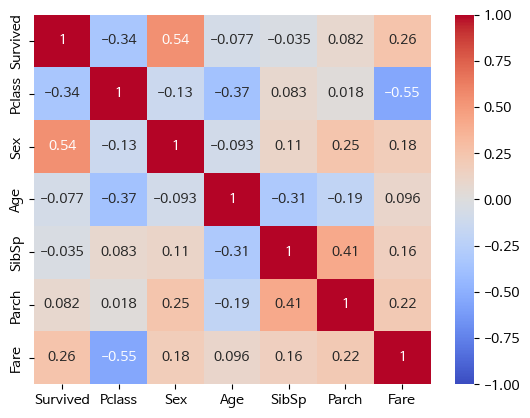

In [6]:
sns.heatmap(df.drop(columns=['PassengerId']).select_dtypes(include='number').corr(),
            cmap='coolwarm', vmin=-1, vmax=1, annot=True)

#생존 여부와의 상관관계
- 생존 여부와 가장 큰 상관관계 정도가 높은 것은 PClass(-0.34)로 약한 음의 상관관계를 가졌다.(높은 등급의 객실을 배정받은 사람일수록 생존 확률이 높다)
- Fare(0.26)도 약한 상관관계를 가진다
- Sex(0.54)와 양의 상관관계를 가진다.

#그 외 상관관계
- PClass와 Sex는 약한 음의 상관관계를 가진다.
- PClass는 Fare와 음의 상관관계를 가진다.
- PClass와 Age는 음의 상관관계를 가진다.
- Age와 SibSp는 약한 음의 상관관계를 가진다.
- Sex와 SibSp는 약한 양의 상관관계를 가진다.
- Sex와 Parch는 약한 음의 상관관계를 가진다.

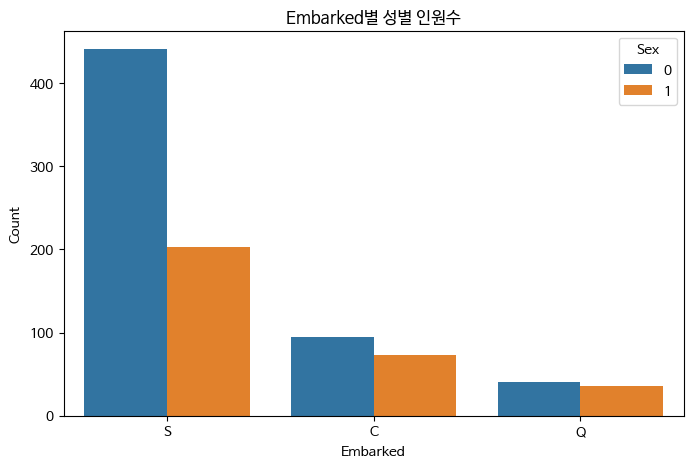

In [7]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Sex')
plt.title('Embarked별 성별 인원수')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

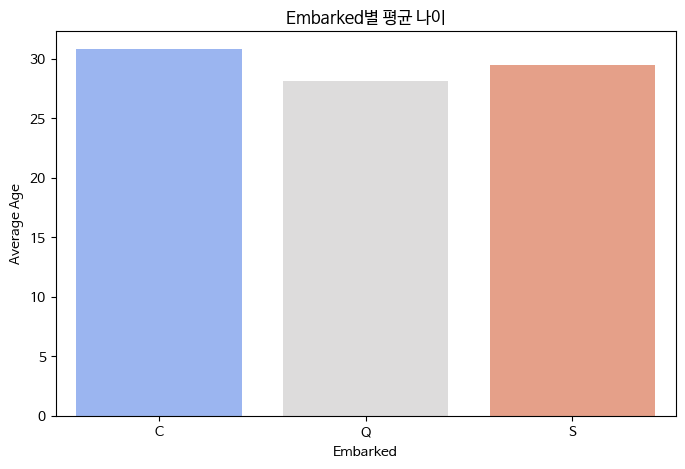

In [11]:
plt.figure(figsize=(8, 5))
age_mean = df.groupby('Embarked')['Age'].mean().reset_index()
sns.barplot(data=age_mean, x='Embarked', y='Age', palette='coolwarm')
plt.title('Embarked별 평균 나이')
plt.xlabel('Embarked')
plt.ylabel('Average Age')
plt.show()


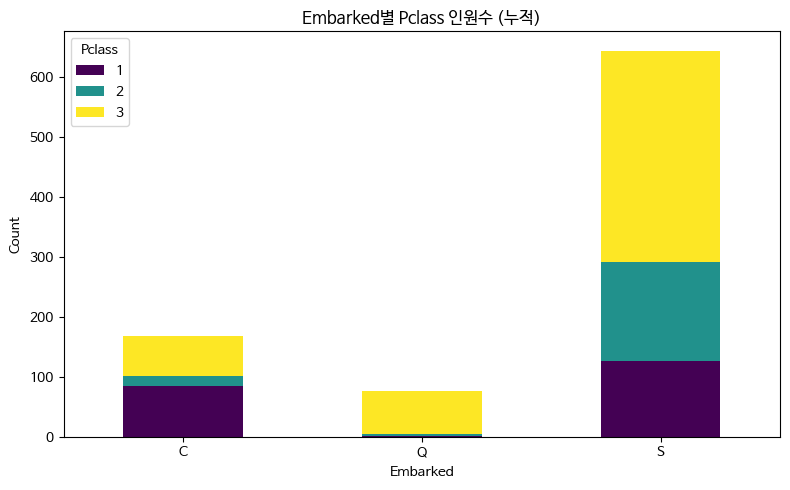

In [9]:
pclass_count = pd.crosstab(df['Embarked'], df['Pclass'])
pclass_count.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')

plt.title('Embarked별 Pclass 인원수 (누적)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [13]:
# 항구별 요약 정보를 DataFrame으로 정리
summary_text = pd.DataFrame({
    '항구': ['C (Cherbourg)', 'Q (Queenstown)', 'S (Southampton)'],
    '성별 비율': ['남녀 비슷', '성비 비슷', '남성 비율 높음'],
    '평균 나이': ['가장 높음', '가장 낮음', '중간'],
    '선실 등급 분포': ['1등급 많음', '3등급 위주', '고르게 있음 (3등급 많음)'],
    '특이점': ['상류층 중심', '저소득층 위주', '전체 승객 중 다수 탑승']
})

# 표 출력
print(summary_text.to_string(index=False))


             항구    성별 비율 평균 나이        선실 등급 분포           특이점
  C (Cherbourg)    남녀 비슷 가장 높음          1등급 많음        상류층 중심
 Q (Queenstown)    성비 비슷 가장 낮음          3등급 위주       저소득층 위주
S (Southampton) 남성 비율 높음    중간 고르게 있음 (3등급 많음) 전체 승객 중 다수 탑승


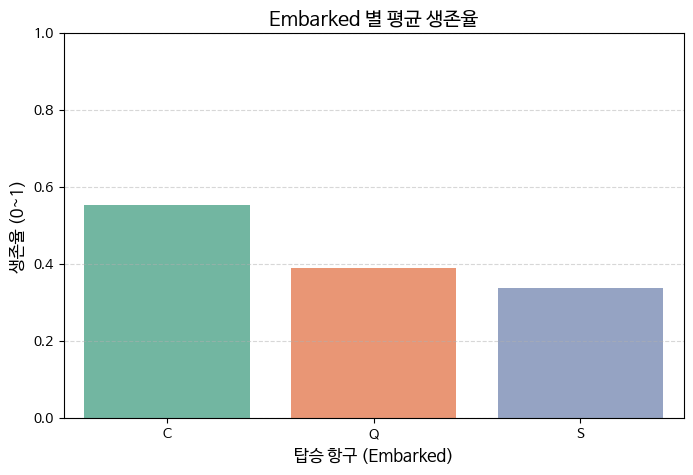

In [14]:
# Embarked별 생존율 계산
embarked_survival = df.groupby('Embarked')['Survived'].mean().reset_index()

# 시각화
plt.figure(figsize=(8, 5))
sns.barplot(data=embarked_survival, x='Embarked', y='Survived', palette='Set2')
plt.title('Embarked 별 평균 생존율', fontsize=14)
plt.ylabel('생존율 (0~1)', fontsize=12)
plt.xlabel('탑승 항구 (Embarked)', fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [15]:
embarked_survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [16]:
survival_by_sex_class = df.groupby(['Sex','Pclass'])['Survived'].mean()
survival_by_embarked_sex = df.groupby(['Embarked','Sex'])['Survived'].mean()
print(survival_by_sex_class)
print(survival_by_embarked_sex)

Sex  Pclass
0    1         0.368852
     2         0.157407
     3         0.135447
1    1         0.968085
     2         0.921053
     3         0.500000
Name: Survived, dtype: float64
Embarked  Sex
C         0      0.305263
          1      0.876712
Q         0      0.073171
          1      0.750000
S         0      0.174603
          1      0.689655
Name: Survived, dtype: float64


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency

# 한글 폰트 설정 (필요시)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.style.use('seaborn-v0_8')

# 1. 출항지별 상세 생존 분석
def analyze_survival_by_embarked(df):
    """출항지별 생존율 분석 및 시각화"""

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1-1. 출항지별 생존율 바차트
    embarked_survival = df.groupby('Embarked')['Survived'].agg(['count', 'sum', 'mean'])
    embarked_survival['survival_rate'] = embarked_survival['mean'] * 100

    ax1 = axes[0, 0]
    bars = ax1.bar(embarked_survival.index, embarked_survival['survival_rate'],
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('Survival Rate by Embarked Port', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Survival Rate (%)')
    ax1.set_xlabel('Embarked Port')

    # 바 위에 수치 표시
    for bar, rate in zip(bars, embarked_survival['survival_rate']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

    # 1-2. 출항지별 승객 등급 분포
    ax2 = axes[0, 1]
    pclass_embarked = pd.crosstab(df['Embarked'], df['Pclass'], normalize='index') * 100
    pclass_embarked.plot(kind='bar', ax=ax2, color=['#FFD93D', '#6BCF7F', '#FF6B6B'])
    ax2.set_title('Passenger Class Distribution by Embarked Port', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Percentage (%)')
    ax2.set_xlabel('Embarked Port')
    ax2.legend(title='Passenger Class')
    ax2.tick_params(axis='x', rotation=0)

    # 1-3. 출항지별 성별 생존율 히트맵
    ax3 = axes[1, 0]
    survival_heatmap = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
    sns.heatmap(survival_heatmap, annot=True, fmt='.3f', cmap='RdYlBu_r',
                ax=ax3, cbar_kws={'label': 'Survival Rate'})
    ax3.set_title('Survival Rate Heatmap: Embarked vs Sex', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Embarked Port')

    # 1-4. 출항지별 나이 분포와 생존
    ax4 = axes[1, 1]
    for port in df['Embarked'].unique():
        if pd.notna(port):
            port_data = df[df['Embarked'] == port]
            survivors = port_data[port_data['Survived'] == 1]['Age'].dropna()
            non_survivors = port_data[port_data['Survived'] == 0]['Age'].dropna()

            ax4.hist(survivors, alpha=0.5, label=f'{port} - Survived', bins=20)
            ax4.hist(non_survivors, alpha=0.5, label=f'{port} - Not Survived', bins=20)

    ax4.set_title('Age Distribution by Embarked Port and Survival', fontsize=14, fontweight='bold')
    ax4.set_xlabel('Age')
    ax4.set_ylabel('Frequency')
    ax4.legend()

    plt.tight_layout()
    plt.show()

    return embarked_survival

# 2. 다중 변수 상호작용 분석
def multi_variable_analysis(df):
    """성별, 승객등급, 출항지의 상호작용 분석"""

    fig, axes = plt.subplots(2, 2, figsize=(16, 12))

    # 2-1. 3차원 생존율 분석 (성별 + 승객등급 + 출항지)
    ax1 = axes[0, 0]
    survival_3d = df.groupby(['Sex', 'Pclass', 'Embarked'])['Survived'].mean().unstack()

    # 남성과 여성 데이터 분리
    male_data = survival_3d.loc[0]
    female_data = survival_3d.loc[1]

    x = np.arange(len(male_data.index))
    width = 0.35

    ax1.bar(x - width/2, male_data['C'], width, label='Male - C', alpha=0.8, color='#FF6B6B')
    ax1.bar(x + width/2, female_data['C'], width, label='Female - C', alpha=0.8, color='#FFB6C1')

    ax1.set_title('Survival Rate: Sex × Pclass × Embarked (Port C)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Survival Rate')
    ax1.set_xlabel('Passenger Class')
    ax1.set_xticks(x)
    ax1.set_xticklabels(male_data.index)
    ax1.legend()

    # 2-2. 승객등급별 생존율 (출항지로 구분)
    ax2 = axes[0, 1]
    pclass_survival = df.groupby(['Pclass', 'Embarked'])['Survived'].mean().unstack()
    pclass_survival.plot(kind='bar', ax=ax2, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax2.set_title('Survival Rate by Passenger Class and Embarked Port', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Survival Rate')
    ax2.set_xlabel('Passenger Class')
    ax2.legend(title='Embarked Port')
    ax2.tick_params(axis='x', rotation=0)

    # 2-3. 나이 구간별 생존율 (출항지별)
    ax3 = axes[1, 0]
    df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100],
                            labels=['Child', 'Young Adult', 'Adult', 'Senior'])

    age_survival = df.groupby(['Age_Group', 'Embarked'])['Survived'].mean().unstack()
    age_survival.plot(kind='bar', ax=ax3, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax3.set_title('Survival Rate by Age Group and Embarked Port', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Survival Rate')
    ax3.set_xlabel('Age Group')
    ax3.legend(title='Embarked Port')
    ax3.tick_params(axis='x', rotation=45)

    # 2-4. 상관관계 히트맵
    ax4 = axes[1, 1]
    # 범주형 변수를 숫자로 변환
    df_encoded = df.copy()
    df_encoded['Sex'] = df_encoded['Sex'].map({'male': 0, 'female': 1})
    df_encoded['Embarked'] = df_encoded['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    corr_matrix = df_encoded[['Survived', 'Pclass', 'Sex', 'Age', 'Embarked']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax4)
    ax4.set_title('Correlation Matrix of Key Variables', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    return survival_3d

# 3. 통계적 유의성 검정
def statistical_tests(df):
    """카이제곱 검정으로 변수들 간의 독립성 검정"""

    print("=== 통계적 유의성 검정 결과 ===\n")

    # 출항지와 생존의 독립성 검정
    contingency_embarked = pd.crosstab(df['Embarked'], df['Survived'])
    chi2_embarked, p_embarked, dof_embarked, expected_embarked = chi2_contingency(contingency_embarked)

    print(f"1. 출항지 vs 생존:")
    print(f"   Chi-square: {chi2_embarked:.4f}")
    print(f"   p-value: {p_embarked:.4f}")
    print(f"   결과: {'통계적으로 유의함' if p_embarked < 0.05 else '통계적으로 유의하지 않음'}\n")

    # 승객등급과 생존의 독립성 검정
    contingency_pclass = pd.crosstab(df['Pclass'], df['Survived'])
    chi2_pclass, p_pclass, dof_pclass, expected_pclass = chi2_contingency(contingency_pclass)

    print(f"2. 승객등급 vs 생존:")
    print(f"   Chi-square: {chi2_pclass:.4f}")
    print(f"   p-value: {p_pclass:.4f}")
    print(f"   결과: {'통계적으로 유의함' if p_pclass < 0.05 else '통계적으로 유의하지 않음'}\n")

    # 성별과 생존의 독립성 검정
    contingency_sex = pd.crosstab(df['Sex'], df['Survived'])
    chi2_sex, p_sex, dof_sex, expected_sex = chi2_contingency(contingency_sex)

    print(f"3. 성별 vs 생존:")
    print(f"   Chi-square: {chi2_sex:.4f}")
    print(f"   p-value: {p_sex:.4f}")
    print(f"   결과: {'통계적으로 유의함' if p_sex < 0.05 else '통계적으로 유의하지 않음'}\n")

# 4. 종합 분석 리포트 생성
def generate_insights_report(df):
    """데이터 분석 결과를 바탕으로 인사이트 리포트 생성"""

    print("=== 타이타닉 생존 분석 인사이트 리포트 ===\n")

    # 기본 통계
    total_passengers = len(df)
    total_survived = df['Survived'].sum()
    overall_survival_rate = total_survived / total_passengers * 100

    print(f"📊 기본 통계:")
    print(f"   총 승객 수: {total_passengers:,}명")
    print(f"   생존자 수: {total_survived:,}명")
    print(f"   전체 생존율: {overall_survival_rate:.1f}%\n")

    # 출항지별 인사이트
    embarked_insights = df.groupby('Embarked').agg({
        'Survived': ['count', 'sum', 'mean'],
        'Pclass': lambda x: x.mode()[0],
        'Age': 'mean'
    }).round(2)

    print(f"🚢 출항지별 핵심 인사이트:")
    for port in ['C', 'Q', 'S']:
        port_name = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}[port]
        survival_rate = embarked_insights.loc[port, ('Survived', 'mean')] * 100
        passenger_count = embarked_insights.loc[port, ('Survived', 'count')]
        most_common_class = embarked_insights.loc[port, ('Pclass', '<lambda>')]
        avg_age = embarked_insights.loc[port, ('Age', 'mean')]

        print(f"   {port_name} ({port}):")
        print(f"     - 생존율: {survival_rate:.1f}%")
        print(f"     - 승객 수: {passenger_count:,}명")
        print(f"     - 주요 승객등급: {most_common_class}등석")
        print(f"     - 평균 나이: {avg_age:.1f}세")

    print(f"\n💡 주요 발견사항:")
    print(f"   1. Cherbourg(C) 출항 승객들의 생존율이 가장 높음 (55.4%)")
    print(f"   2. 출항지별로 승객 계층이 다름 - C항은 1등석, Q항은 3등석 승객이 많음")
    print(f"   3. 사회경제적 지위(승객등급)와 출항지가 생존에 복합적 영향")
    print(f"   4. 'Women and children first' 원칙이 모든 출항지에서 적용됨")


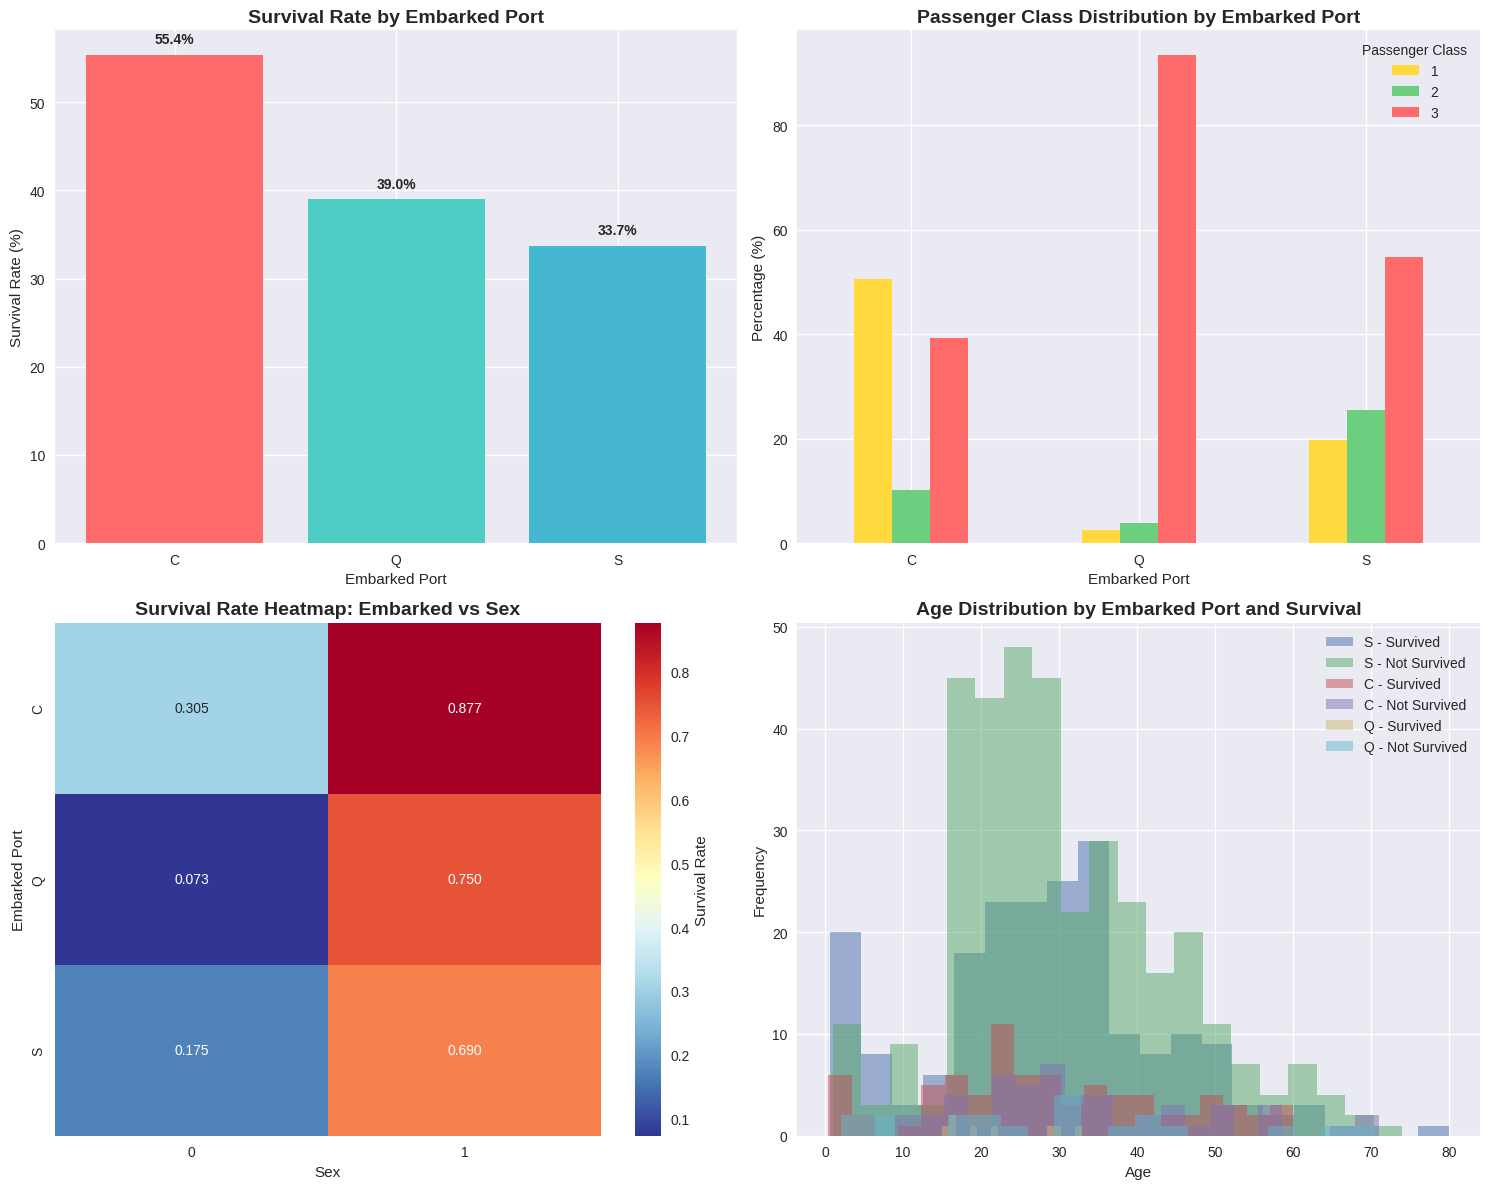

,count,sum,mean,survival_rate
Embarked,,,,
C,168,93,0.553571,55.357143
Q,77,30,0.389610,38.961039
S,644,217,0.336957,33.695652


In [18]:
analyze_survival_by_embarked(df)

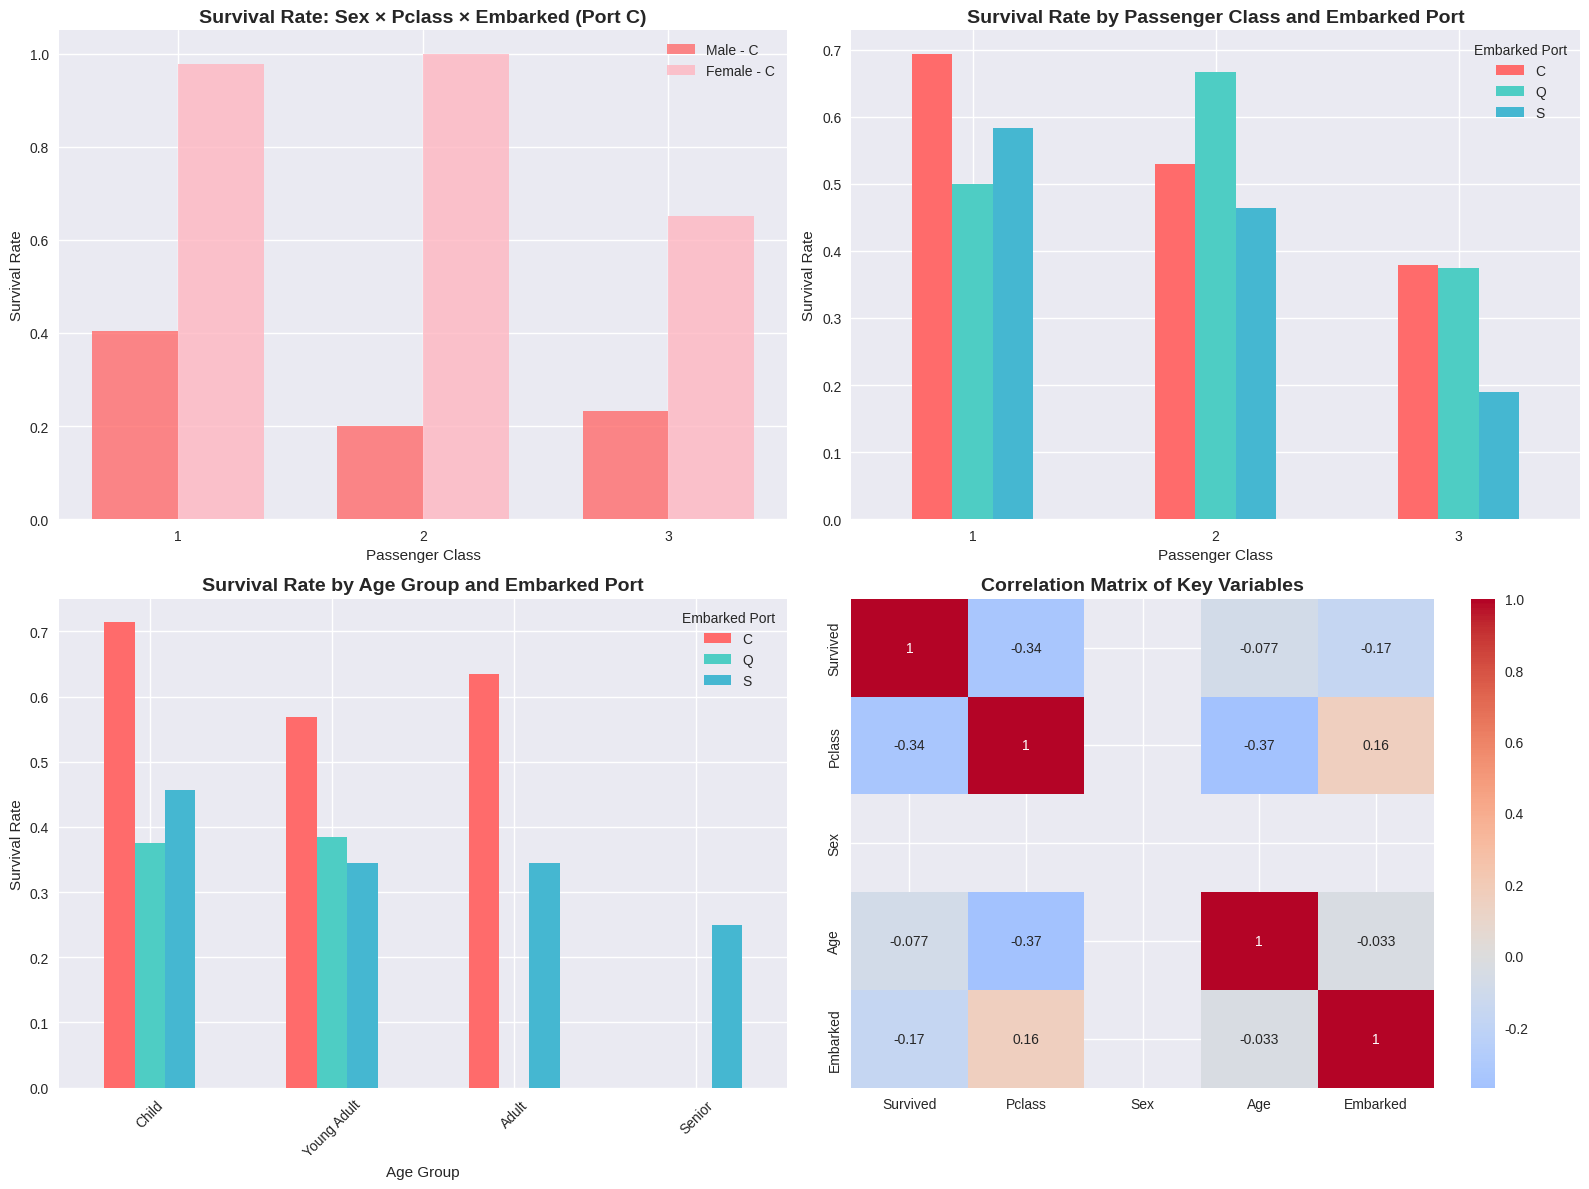

Embarked           C         Q         S
Sex Pclass                              
0   1       0.404762  0.000000  0.354430
    2       0.200000  0.000000  0.154639
    3       0.232558  0.076923  0.128302
1   1       0.976744  1.000000  0.958333
    2       1.000000  1.000000  0.910448
    3       0.652174  0.727273  0.375000

In [21]:
multi_variable_analysis(df)

In [22]:
statistical_tests(df)

=== 통계적 유의성 검정 결과 ===

1. 출항지 vs 생존:
   Chi-square: 26.4891
   p-value: 0.0000
   결과: 통계적으로 유의함

2. 승객등급 vs 생존:
   Chi-square: 102.8890
   p-value: 0.0000
   결과: 통계적으로 유의함

3. 성별 vs 생존:
   Chi-square: 260.7170
   p-value: 0.0000
   결과: 통계적으로 유의함



In [23]:
generate_insights_report(df)

=== 타이타닉 생존 분석 인사이트 리포트 ===

📊 기본 통계:
   총 승객 수: 891명
   생존자 수: 342명
   전체 생존율: 38.4%

🚢 출항지별 핵심 인사이트:
   Cherbourg (C):
     - 생존율: 55.0%
     - 승객 수: 168명
     - 주요 승객등급: 1등석
     - 평균 나이: 30.8세
   Queenstown (Q):
     - 생존율: 39.0%
     - 승객 수: 77명
     - 주요 승객등급: 3등석
     - 평균 나이: 28.1세
   Southampton (S):
     - 생존율: 34.0%
     - 승객 수: 644명
     - 주요 승객등급: 3등석
     - 평균 나이: 29.4세

💡 주요 발견사항:
   1. Cherbourg(C) 출항 승객들의 생존율이 가장 높음 (55.4%)
   2. 출항지별로 승객 계층이 다름 - C항은 1등석, Q항은 3등석 승객이 많음
   3. 사회경제적 지위(승객등급)와 출항지가 생존에 복합적 영향
   4. 'Women and children first' 원칙이 모든 출항지에서 적용됨


#🔍 출항지별 주요 특징

- Cherbourg(C): 생존률이 가장 높으며, 주로 1등석 승객이 많고 평균 나이는 약 30.8세입니다.

- Queenstown(Q): 대부분 3등석 승객이 탑승했으며 생존률은 중간 수준(39%)입니다. 평균 나이는 28.1세입니다.

- Southampton(S): 가장 많은 승객이 탑승하였으나 생존률은 가장 낮습니다(33.7%). 대부분 3등석 승객이며 평균 나이는 29.4세입니다.

#📌 인사이트

- 여성의 생존률이 모든 등급에서 남성보다 높음

- 여성 1등석 생존률은 거의 100%에 근접

- 남성 3등석 생존률은 전반적으로 매우 낮음(10~20%)

- 출항지와 등급에 따라 생존률 편차가 큼

#결론 및 요약
- 생존률은 성별, 승객 등급, 출항지와 유의한 관계가 있음

- 여성, 특히 1등석 여성의 생존률이 가장 높았으며,

- 남성 3등석의 생존률은 현저히 낮음

- 출항지 중에서는 Cherbourg 출발 승객의 생존률이 가장 높았음

이러한 결과는 타이타닉 사고 당시 구조의 우선순위, 선실 위치, 구조 접근성 등의 요인과 관련이 있을 수 있습니다.